## Ver-de Alto: Una propuesta para el impacto ambiental urbano.

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

In [ ]:
"""
Define la URL de la API que contiene los datos de espacios verdes en Valencia.
Esta URL es del portal de datos abiertos del Ayuntamiento.
"""
url_espacio_verde = "https://valencia.opendatasoft.com/api/explore/v2.1/catalog/datasets/espais-verds-espacios-verdes/records"

"""
Se define el número máximo de registros que se pedirán por solicitud.
99 es un valor común usado para no sobrecargar la API.
"""
limit = 99

"""
Offset indica desde qué registro empezar a pedir.
Inicialmente es 0 (es decir, empezamos desde el principio).
"""
offset = 0

"""
Creamos una lista vacía donde se irán acumulando todos los datos que obtengamos de la API.
"""
all_results = []

"""
Iniciamos un bucle que continuará hasta que ya no haya más datos por cargar.
Este bucle hace múltiples peticiones a la API para descargar todos los registros disponibles.
"""
while True:
    """
    Se definen los parámetros que se enviarán en cada petición:
    - limit: cuántos registros queremos por solicitud.
    - offset: desde qué posición empezamos a pedir datos.
    """
    params = {
        'limit': limit,
        'offset': offset
    }

    """
    Se hace la petición HTTP GET a la API con los parámetros definidos.
    """
    response = requests.get(url_espacio_verde, params=params)

    """
    Verificamos que la respuesta fue exitosa (código HTTP 200).
    """
    if response.status_code == 200:
        """
        Convertimos la respuesta JSON a un diccionario de Python.
        """
        data = response.json()

        """
        Extraemos la lista de resultados (registros) del diccionario.
        Si no hay resultados, usamos una lista vacía por defecto.
        """
        records = data.get('results', [])  # Suponiendo que los datos están en 'results'

        """
        Si no se obtuvieron registros (la lista está vacía), rompemos el bucle.
        Eso indica que ya hemos cargado todos los datos disponibles.
        """
        if not records:
            break  # No hay más datos

        """
        Agregamos los registros obtenidos a la lista general que los acumula todos.
        """
        all_results.extend(records)

        """
        Aumentamos el offset para la siguiente solicitud, para que la API devuelva los siguientes registros.
        """
        offset += limit
    else:
        """
        Si hubo un error en la petición (no se recibió código 200), se imprime un mensaje y se detiene el bucle.
        """
        print(f"Error al obtener datos: {response.status_code}")
        break

"""
Convertimos la lista completa de registros en un DataFrame de pandas.
Esto nos permite trabajar con los datos como si fueran una tabla.
"""
df_completo_espacio_verde = pd.DataFrame(all_results)

"""
Imprimimos cuántos registros se han obtenido en total.
"""
print(f"Se obtuvieron {len(df_completo_espacio_verde)} registros.")


Se obtuvieron 778 registros.


In [ ]:
"""
Unificamos nombres de distritos municipales (DM) para evitar inconsistencias en los datos.

Algunas observaciones:
- 'POBLATS MARÍTIMS' tiene tilde, pero en otros lados no. Lo dejamos como 'POBLATS MARITIMS'.
- 'LA SAIDIA' y 'SAIDIA' deben ser tratados como el mismo distrito. Usamos 'SAIDIA'.
- 'SANT PAU' no es un distrito municipal independiente, sino que forma parte de 'CAMPANAR'.

Estas correcciones permiten agrupar correctamente los datos sin errores por nombres distintos.
"""

# Corrige el nombre del distrito 'POBLATS MARÍTIMS' quitando la tilde para unificar con otros registros
df_completo_espacio_verde['dm'] = df_completo_espacio_verde['dm'].str.replace('POBLATS MARÍTIMS', 'POBLATS MARITIMS')

# Reemplaza 'LA SAIDIA' por 'SAIDIA' para unificar nombres
df_completo_espacio_verde['dm'] = df_completo_espacio_verde['dm'].str.replace('LA SAIDIA', 'SAIDIA')

# Sustituye 'SANT PAU' por 'CAMPANAR' porque es un barrio que pertenece a ese distrito
df_completo_espacio_verde['dm'] = df_completo_espacio_verde['dm'].str.replace('SANT PAU', 'CAMPANAR')


In [ ]:
"""
Agrupamos los datos por distrito municipal ('dm') y sumamos el área total de espacios verdes ('st_area_shape') para cada uno.
Esto nos permite saber qué tanto verde hay en cada distrito.
"""
top5 = df_completo_espacio_verde.groupby('dm')['st_area_shape'].sum().sort_values().head(6)

"""
Convertimos el resultado en un DataFrame para poder seguir trabajando con él fácilmente.
"""
df_top5 = top5.to_frame()

"""
Reiniciamos el índice para que 'dm' vuelva a ser una columna normal (en lugar de índice del DataFrame).
Esto facilita su visualización y posterior uso en gráficos.
"""
df_top5 = df_top5.reset_index()

"""
Mostramos el resultado: los 6 distritos con menos área verde total.
"""
df_top5


,dm,st_area_shape
0,POBLATS DEL NORD,44137.235423
1,EXTRAMURS,61481.078655
2,BENIMACLET,71020.620582
3,CIUTAT VELLA,77982.193499
4,POBLATS DE L`OEST,122938.172646
5,L´EIXAMPLA,135062.122467


Index(['dm', 'st_area_shape'], dtype='object')


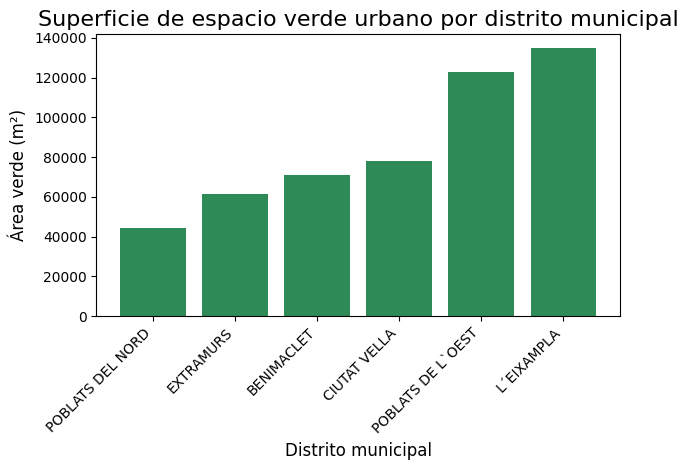

In [ ]:
"""
Importamos la librería matplotlib.pyplot, que nos permite crear gráficos como barras, líneas, etc.
"""
import matplotlib.pyplot as plt

"""
Mostramos las columnas del DataFrame df_top5, para asegurarnos de que existen y están correctamente nombradas.
Esto es útil para verificar que 'dm' y 'st_area_shape' están bien escritos antes de graficar.
"""
print(df_top5.columns)

"""
Creamos un gráfico de barras. 
- En el eje X colocamos los nombres de los distritos municipales (df_top5['dm']).
- En el eje Y, el área total de espacios verdes por distrito (df_top5['st_area_shape']).
- Usamos un color verde ('seagreen') para representar las áreas verdes.
"""
plt.bar(df_top5['dm'], df_top5['st_area_shape'], color='seagreen')

"""
Agregamos un título al gráfico y etiquetas a los ejes.
"""
plt.title('Superficie de espacio verde urbano por distrito municipal', fontsize=16)
plt.xlabel('Distrito municipal', fontsize=12)
plt.ylabel('Área verde (m²)', fontsize=12)

"""
Rotamos las etiquetas del eje X 45 grados para que no se encimen y se lean bien.
'ha=right' alinea el texto hacia la derecha.
"""
plt.xticks(rotation=45, ha='right')

"""
Ajustamos el diseño automáticamente para que no se corte ningún texto o elemento del gráfico.
"""
plt.tight_layout()

"""
Mostramos el gráfico en pantalla.
"""
plt.show()


                  dm  st_area_shape  habitantes  verde_x_persona
0   POBLATS DEL NORD   44137.235423        6875         6.419962
1          EXTRAMURS   61481.078655       49335         1.246196
2         BENIMACLET   71020.620582       28317         2.508056
3       CIUTAT VELLA   77982.193499       28763         2.711198
4  POBLATS DE L`OEST  122938.172646       14758         8.330273
5         L´EIXAMPLA  135062.122467       43565         3.100244


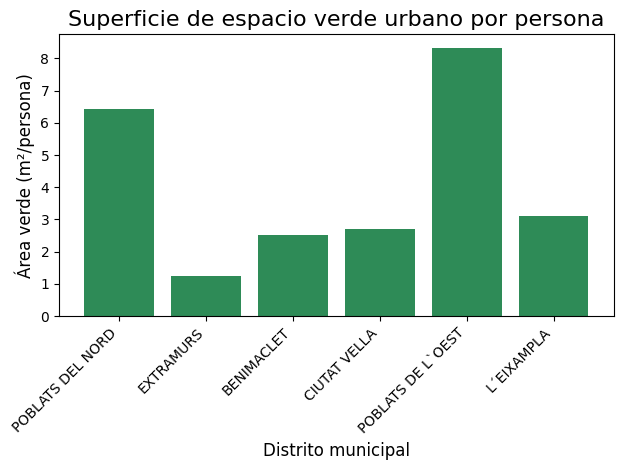

In [ ]:
"""
Creamos un diccionario con el número de habitantes por distrito municipal ('dm').
Este ejemplo incluye solo algunos distritos (6 en total).
"""
habitantes = {
    "dm": ["POBLATS DEL NORD", "EXTRAMURS", "BENIMACLET", "CIUTAT VELLA", "POBLATS DE L`OEST", "L´EIXAMPLA"],
    "habitantes": [6875, 49335, 28317, 28763, 14758, 43565]
}

"""
Convertimos el diccionario en un DataFrame de pandas.
Esto facilita combinarlo con el DataFrame de áreas verdes.
"""
df_hab = pd.DataFrame(habitantes)

"""
Unimos (merge) los datos de áreas verdes con los de población, usando la columna 'dm' como clave.
Usamos 'how="left"' para mantener todos los distritos de df_top5 y agregar solo los datos de habitantes disponibles.
"""
df_verde_x_hab = pd.merge(df_top5, df_hab, on='dm', how='left')

"""
Creamos una nueva columna que calcula los m² de área verde por persona.
Esto se hace dividiendo el área total entre el número de habitantes.
"""
df_verde_x_hab["verde_x_persona"] = df_verde_x_hab['st_area_shape'] / df_verde_x_hab['habitantes']

"""
Mostramos el DataFrame resultante para verificar los datos.
Incluye: distrito, área verde total, habitantes y área verde por persona.
"""
print(df_verde_x_hab)

"""
Creamos un gráfico de barras con matplotlib.
- Eje X: nombres de los distritos
- Eje Y: área verde por persona (m²/persona)
- Color: verde ('seagreen') para representar espacios verdes
"""
plt.bar(df_verde_x_hab['dm'], df_verde_x_hab['verde_x_persona'], color='seagreen')

"""
Configuramos el título y las etiquetas del gráfico.
"""
plt.title('Superficie de espacio verde urbano por persona', fontsize=16)
plt.xlabel('Distrito municipal', fontsize=12)
plt.ylabel('Área verde (m²/persona)', fontsize=12)

"""
Rotamos las etiquetas del eje X para que no se superpongan y se vean bien.
"""
plt.xticks(rotation=45, ha='right')

"""
Ajustamos automáticamente los márgenes para que no se corte el contenido del gráfico.
"""
plt.tight_layout()

"""
Mostramos el gráfico.
"""
plt.show()


/var/folders/m6/y98jj5d17zjghj83x_tbs1f80000gn/T/ipykernel_9218/2424669505.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/m6/y98jj5d17zjghj83x_tbs1f80000gn/T/ipykernel_9218/2424669505.py:39: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



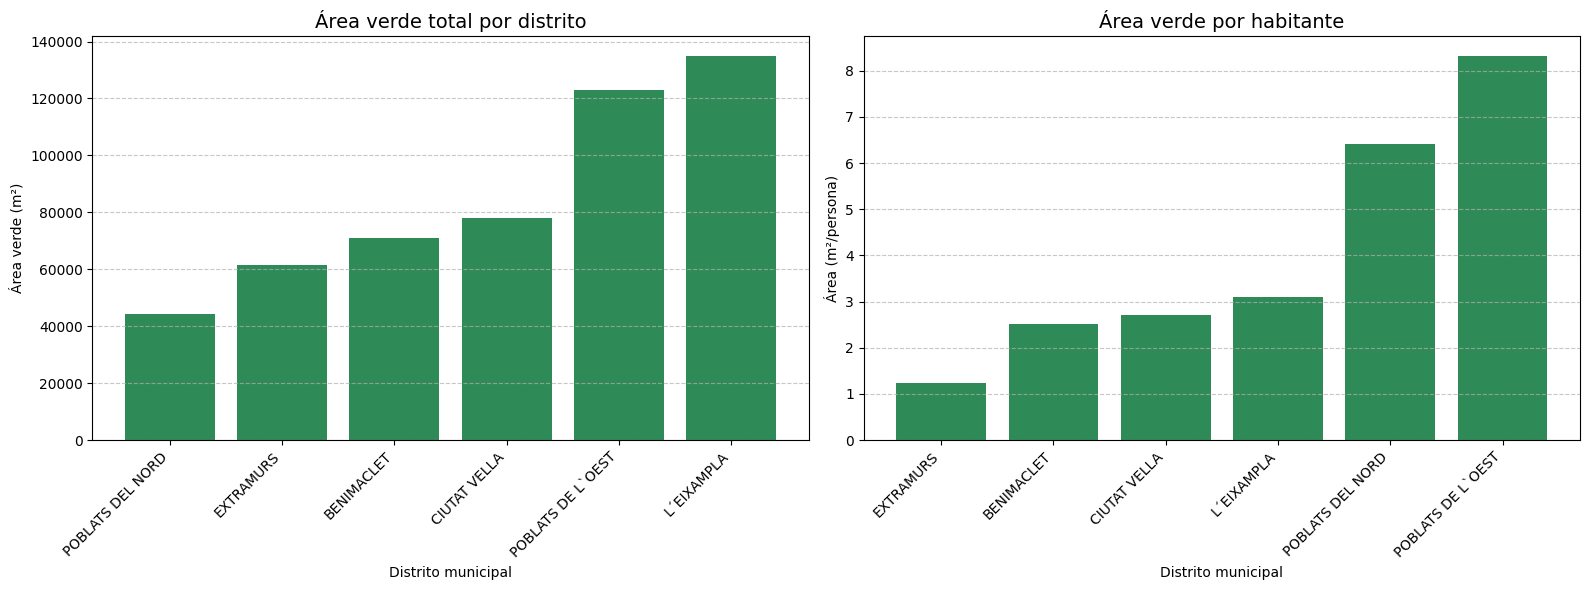

In [ ]:
"""
Creamos un diccionario con el número de habitantes por distrito municipal ('dm').
Este ejemplo incluye seis distritos con sus respectivas poblaciones.
"""
habitantes = {
    "dm": ["POBLATS DEL NORD", "EXTRAMURS", "BENIMACLET", "CIUTAT VELLA", "POBLATS DE L`OEST", "L´EIXAMPLA"],
    "habitantes": [6875, 49335, 28317, 28763, 14758, 43565]
}

"""
Convertimos el diccionario en un DataFrame de pandas para poder unirlo con los datos de áreas verdes.
"""
df_hab = pd.DataFrame(habitantes)

"""
Unimos (merge) el DataFrame de área verde con el de habitantes usando 'dm' como clave.
Usamos 'left' para conservar todos los distritos presentes en df_top5.
"""
df_verde_x_hab = pd.merge(df_top5, df_hab, on='dm', how='left')

"""
Creamos una nueva columna que representa el área verde por persona,
dividiendo el área total entre la cantidad de habitantes en ese distrito.
"""
df_verde_x_hab["verde_x_persona"] = df_verde_x_hab['st_area_shape'] / df_verde_x_hab['habitantes']

"""
Ordenamos los datos para preparar los gráficos:
- Uno por área verde total
- Otro por área verde por habitante
"""
df_area_total_ordenado = df_verde_x_hab.sort_values('st_area_shape', ascending=True)
df_verde_x_persona_ordenado = df_verde_x_hab.sort_values('verde_x_persona', ascending=True)

"""
Creamos una figura con dos subgráficos (1 fila, 2 columnas), con un tamaño total de 16x6 pulgadas.
"""
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
colors = 'seagreen'  # Color para las barras de los dos gráficos

# ----------- Primer gráfico: Área verde total por distrito ------------
axs[0].bar(df_area_total_ordenado['dm'], df_area_total_ordenado['st_area_shape'], color=colors)
axs[0].set_title('Área verde total por distrito', fontsize=14)
axs[0].set_xlabel('Distrito municipal')
axs[0].set_ylabel('Área verde (m²)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xticklabels(df_area_total_ordenado['dm'], rotation=45, ha='right')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# ----------- Segundo gráfico: Área verde por habitante ------------
axs[1].bar(df_verde_x_persona_ordenado['dm'], df_verde_x_persona_ordenado['verde_x_persona'], color=colors)
axs[1].set_title('Área verde por habitante', fontsize=14)
axs[1].set_xlabel('Distrito municipal')
axs[1].set_ylabel('Área (m²/persona)')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xticklabels(df_verde_x_persona_ordenado['dm'], rotation=45, ha='right')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

"""
Ajustamos automáticamente los márgenes para que no se solapen los elementos del gráfico.
"""
plt.tight_layout()

"""
Mostramos el gráfico completo con ambos subgráficos.
"""
plt.show()


-------------------------------------------

In [ ]:
"""
Creamos un diccionario con la superficie edificada (en hectáreas) de varios distritos municipales ('dm').
Esta superficie representa el total del distrito (no solo el área verde).
"""
superficie_edificacion = {
    "dm": ["POBLATS DEL NORD", "EXTRAMURS", "BENIMACLET", "CIUTAT VELLA", "POBLATS DE L`OEST", "L´EIXAMPLA"],
    "superficie": [152, 197, 157, 169, 201, 173]  # Las superficies están en hectáreas
}

"""
Convertimos ese diccionario en un DataFrame.
Esto nos permitirá combinarlo (hacer merge) con los datos de habitantes y espacios verdes.
"""
df_hectareas = pd.DataFrame(superficie_edificacion)

# --------------------- FUSIÓN DE DATOS Y CÁLCULOS ---------------------

"""
Comenzamos uniendo (merge) los datos de área verde con los de habitantes.
El merge se hace por la columna 'dm', usando 'left' para mantener los distritos de df_top5.
"""
df_analisis = pd.merge(df_top5, df_hab, on='dm', how='left')

"""
Luego, unimos el resultado con los datos de superficie total de los distritos.
De nuevo, usamos 'dm' como clave.
"""
df_analisis = pd.merge(df_analisis, df_hectareas, on='dm', how='left')

"""
Convertimos las superficies que están en hectáreas a metros cuadrados.
Recordatorio: 1 hectárea = 10,000 m²
Así, podemos comparar todo en la misma unidad de medida.
"""
df_analisis['superficie_total_dm_m2'] = df_analisis['superficie'] * 10000

"""
Mostramos el DataFrame resultante, que incluye:
- Área verde total
- Número de habitantes
- Superficie del distrito (en hectáreas y en m²)
"""
df_analisis


,dm,st_area_shape,habitantes,superficie,superficie_total_dm_m2
0,POBLATS DEL NORD,44137.235423,6875,152,1520000
1,EXTRAMURS,61481.078655,49335,197,1970000
2,BENIMACLET,71020.620582,28317,157,1570000
3,CIUTAT VELLA,77982.193499,28763,169,1690000
4,POBLATS DE L`OEST,122938.172646,14758,201,2010000
5,L´EIXAMPLA,135062.122467,43565,173,1730000


--- Resultados Clave para Distritos Seleccionados ---
             dm  st_area_shape  habitantes  superficie_total_dm_m2  \
1     EXTRAMURS       61481.08       49335                 1970000   
2    BENIMACLET       71020.62       28317                 1570000   
3  CIUTAT VELLA       77982.19       28763                 1690000   

   potencial_azoteas_m2  verde_total_con_azoteas_m2  verde_x_persona  \
1               29550.0                    91031.08             1.25   
2               23550.0                    94570.62             2.51   
3               25350.0                   103332.19             2.71   

   verde_por_persona_con_azoteas  
1                           1.85  
2                           3.34  
3                           3.59  


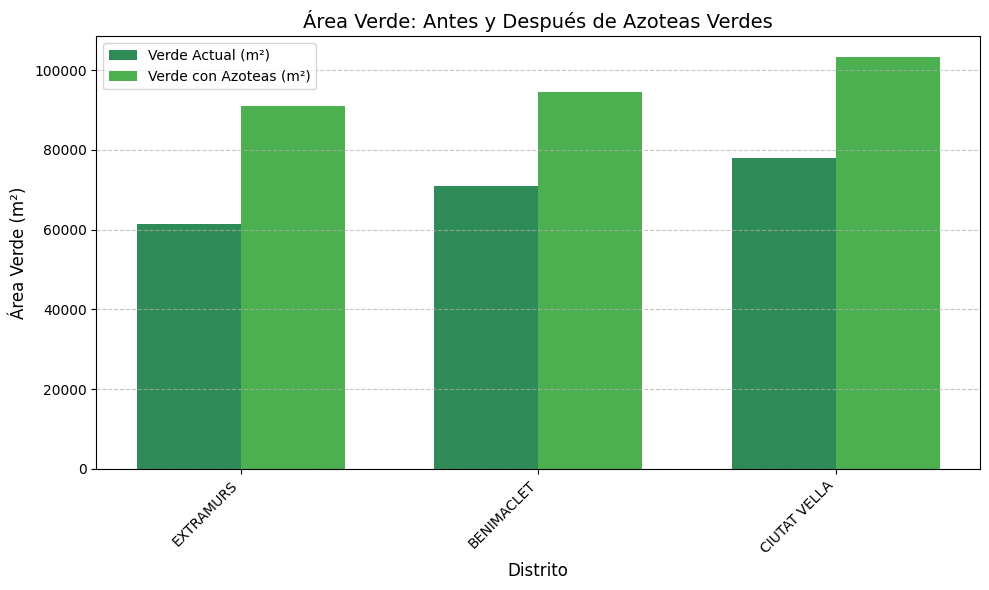

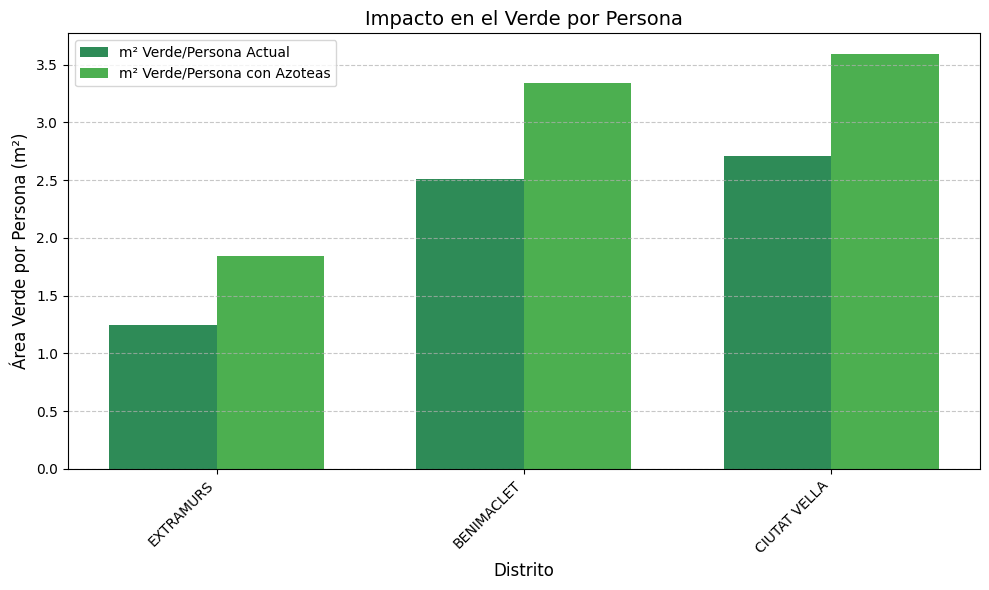

In [ ]:
"""
Definimos dos porcentajes clave:
- pct_edificio: porcentaje del total de superficie del distrito ocupado por edificaciones (10%)
- pct_azoteas_aptas: porcentaje de esas edificaciones cuyas azoteas son planas y aptas para instalar verde (15%)
"""
pct_edificio = 0.10
pct_azoteas_aptas = 0.15

# --- CALCULO DEL POTENCIAL DE NUEVAS AZOTEAS VERDES ---

"""
Estimamos cuántos metros cuadrados de azoteas podrían convertirse en espacios verdes,
multiplicando:
superficie total del distrito × % de edificación × % de azoteas aptas.
"""
df_analisis['potencial_azoteas_m2'] = df_analisis['superficie_total_dm_m2'] * pct_edificio * pct_azoteas_aptas

"""
Calculamos la nueva superficie verde si se implementaran las azoteas verdes:
verde actual + potencial de azoteas.
"""
df_analisis['verde_total_con_azoteas_m2'] = df_analisis['st_area_shape'] + df_analisis['potencial_azoteas_m2']

"""
Calculamos el área verde actual por persona.
"""
df_analisis['verde_x_persona'] = df_analisis['st_area_shape'] / df_analisis['habitantes']

"""
Calculamos el área verde por persona después de implementar azoteas verdes.
"""
df_analisis['verde_por_persona_con_azoteas'] = df_analisis['verde_total_con_azoteas_m2'] / df_analisis['habitantes']

# --- SELECCIÓN DE DISTRITOS CLAVE PARA IMPLEMENTAR ---
"""
Seleccionamos algunos distritos que podrían beneficiarse especialmente de la medida.
"""
distritos_clave = ["BENIMACLET", "CIUTAT VELLA", "EXTRAMURS"]
df_analisis_final = df_analisis[df_analisis['dm'].isin(distritos_clave)].copy()

"""
Mostramos una tabla con los principales resultados para esos distritos.
Incluye valores antes y después de la implementación de azoteas verdes.
Redondeamos a 2 decimales para mayor claridad.
"""
print("--- Resultados Clave para Distritos Seleccionados ---")
print(df_analisis_final[['dm', 'st_area_shape', 'habitantes', 'superficie_total_dm_m2',
                         'potencial_azoteas_m2', 'verde_total_con_azoteas_m2',
                         'verde_x_persona', 'verde_por_persona_con_azoteas']].round(2))
"""
Creamos un gráfico de barras comparando el área verde actual con el total estimado si se implementan azoteas verdes.
"""
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
idx_dm = np.arange(len(df_analisis_final['dm']))  # Posiciones para las barras

# Barras para el verde actual
ax.bar(idx_dm - bar_width/2, df_analisis_final['st_area_shape'], bar_width,
       label='Verde Actual (m²)', color='seagreen')

# Barras para el verde estimado con azoteas
ax.bar(idx_dm + bar_width/2, df_analisis_final['verde_total_con_azoteas_m2'], bar_width,
       label='Verde con Azoteas (m²)', color='#4CAF50')

# Configuración del gráfico
ax.set_xlabel('Distrito', fontsize=12)
ax.set_ylabel('Área Verde (m²)', fontsize=12)
ax.set_title('Área Verde: Antes y Después de Azoteas Verdes', fontsize=14)
ax.set_xticks(idx_dm)
ax.set_xticklabels(df_analisis_final['dm'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
"""
Creamos un gráfico de barras para comparar el verde disponible por persona antes y después de las azoteas verdes.
"""
fig, ax = plt.subplots(figsize=(10, 6))

# Verde por persona actual
ax.bar(idx_dm - bar_width/2, df_analisis_final['verde_x_persona'], bar_width,
       label='m² Verde/Persona Actual', color='seagreen')

# Verde por persona con azoteas
ax.bar(idx_dm + bar_width/2, df_analisis_final['verde_por_persona_con_azoteas'], bar_width,
       label='m² Verde/Persona con Azoteas', color='#4CAF50')

# Configuración del gráfico
ax.set_xlabel('Distrito', fontsize=12)
ax.set_ylabel('Área Verde por Persona (m²)', fontsize=12)
ax.set_title('Impacto en el Verde por Persona', fontsize=14)
ax.set_xticks(idx_dm)
ax.set_xticklabels(df_analisis_final['dm'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


-------------------------

In [ ]:
"""
Definimos un factor ambiental:
Cada metro cuadrado de azotea verde puede absorber aproximadamente 2 kg de CO₂ al año.
Este es un valor estimado con base en estudios urbanos de impacto vegetal.
"""
CO2_ABSORCION_KG_M2_ANUAL = 2  # kg de CO₂ absorbidos por m² de azotea verde al año

# ----------------- CÁLCULO DE REDUCCIÓN POTENCIAL DE CO₂ -----------------

"""
Calculamos cuánto CO₂ se reduciría al año en cada distrito, multiplicando
los m² potenciales de azoteas verdes por el factor de absorción de CO₂.
El resultado se guarda en una nueva columna: 'co2_reducido_kg_anual'.
"""
df_analisis_final['co2_reducido_kg_anual'] = df_analisis_final['potencial_azoteas_m2'] * CO2_ABSORCION_KG_M2_ANUAL

"""
Estimamos a cuántos coches equivaldría esa reducción de CO₂.
Usamos el dato promedio de que un coche emite unos 4600 kg de CO₂ por año.
"""
nro_coches_equiv = df_analisis_final['co2_reducido_kg_anual'].sum() / 4600

# ---------------------- MOSTRAR RESULTADOS FINALES ----------------------

"""
Mostramos para cada distrito:
- Superficie de azoteas verdes potenciales
- Reducción estimada de CO₂ en kg/año
"""
print(df_analisis_final[['dm', 'potencial_azoteas_m2', 'co2_reducido_kg_anual']].round(2))

"""
Mostramos la suma total del CO₂ que podría eliminarse con estas azoteas,
y lo traducimos a una equivalencia más comprensible: número de coches retirados del aire.
"""
print(f"Una suma de: {df_analisis_final['co2_reducido_kg_anual'].sum()} kg de CO₂ y equivalente a {nro_coches_equiv.round(2)} coches por año")


             dm  potencial_azoteas_m2  co2_reducido_kg_anual
1     EXTRAMURS               29550.0                59100.0
2    BENIMACLET               23550.0                47100.0
3  CIUTAT VELLA               25350.0                50700.0
Una suma de: 156900.0 kg de C02 y equivalente a 34.11 coches por año


/var/folders/m6/y98jj5d17zjghj83x_tbs1f80000gn/T/ipykernel_9218/2178592349.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



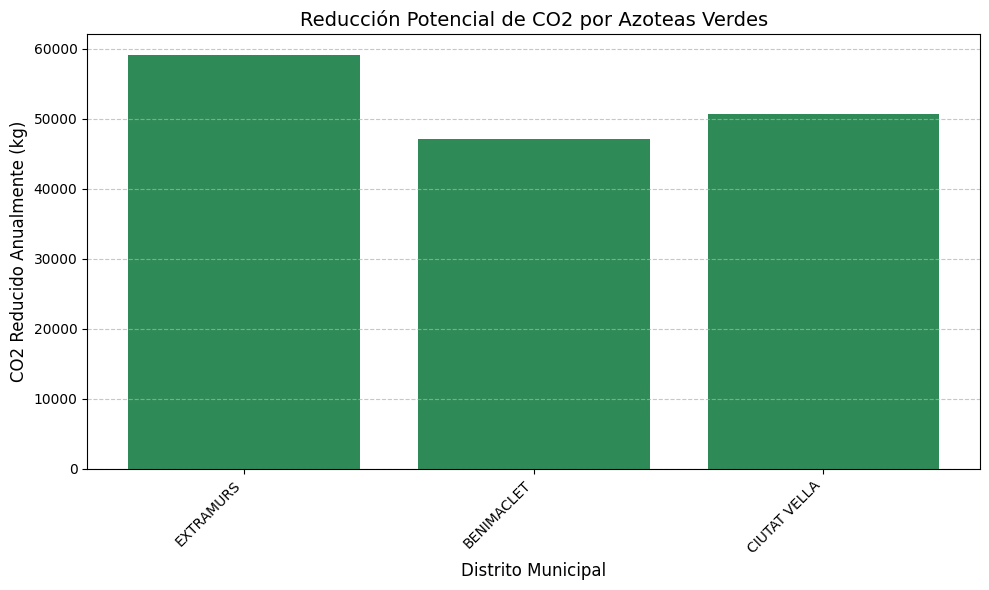

In [ ]:
"""
--- Gráfico 3: Reducción Potencial de Contaminación (CO₂) ---

Este gráfico muestra cuántos kilogramos de CO₂ podrían absorberse anualmente
si se implementaran azoteas verdes en los distritos seleccionados.
"""
fig, ax = plt.subplots(figsize=(10, 6))  # Creamos una figura de tamaño adecuado

"""
Dibujamos un gráfico de barras donde:
- El eje X representa los distritos municipales
- El eje Y representa la cantidad de CO₂ que se reduciría anualmente (en kg)
"""
ax.bar(df_analisis_final['dm'], df_analisis_final['co2_reducido_kg_anual'], color='seagreen')

# Etiquetas y título del gráfico
ax.set_xlabel('Distrito Municipal', fontsize=12)
ax.set_ylabel('CO₂ Reducido Anualmente (kg)', fontsize=12)
ax.set_title('Reducción Potencial de CO₂ por Azoteas Verdes', fontsize=14)

# Rotamos las etiquetas del eje X para mejorar la lectura
ax.tick_params(axis='x', rotation=45)
ax.set_xticklabels(df_analisis_final['dm'], rotation=45, ha='right')

# Añadimos líneas de cuadrícula horizontales para facilitar la comparación
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustamos automáticamente los márgenes para que no se solapen los elementos
plt.tight_layout()

# Mostramos el gráfico
plt.show()
